In [1]:
import numpy as np
import cv2
import scipy
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy.linalg as LA

In [2]:
def fit_fundamental(matches, normalized=False, wh=None):
    
    N = len(matches)
    matches[:2] -= (wh/2)
    matches[2:] -= (wh/2)
    matches[:2] *= (4 / wh)
    matches[2:] *= (4 / wh)
    u = matches[:,0]
    v = matches[:,1]
    u_pr = matches[:,2]
    v_pr = matches[:,3]
    
    A = np.zeros((N, 8))
    A[:,0] = u_pr * u
    A[:,1] = u_pr * v
    A[:,2] = u_pr
    A[:,3] = v_pr * u
    A[:,4] = v_pr * v
    A[:,5] = v_pr
    A[:,6] = u
    A[:,7] = v
    
    targets = -1 * np.ones(N)
    
    F = LA.lstsq(A, targets)[0]
    
    F = np.append(F, 1).reshape((3,3))
    
    U, s, V = LA.svd(F)
    s[-1] = 0
    F = np.matmul(np.matmul(U, np.diag(s)), V)
    
    return F
    
    

In [3]:
def sample_code(image1, image2, matches, normalized=False):
    I1 = Image.open(image1)
    I2 = Image.open(image2)
    matches = np.loadtxt(matches)

    # this is a N x 4 file where the first two numbers of each row
    # are coordinates of corners in the first image and the last two
    # are coordinates of corresponding corners in the second image: 
    # matches(i,1:2) is a point in the first image
    # matches(i,3:4) is a corresponding point in the second image

    N = len(matches)

    ##
    ## display two images side-by-side with matches
    ## this code is to help you visualize the matches, you don't need
    ## to use it to produce the results for the assignment
    ##

    I3 = np.zeros((I1.size[1],I1.size[0]*2,3) )
    I3[:,:I1.size[0],:] = I1;
    I3[:,I1.size[0]:,:] = I2;
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(I3).astype(float))
    ax.plot(matches[:,0],matches[:,1],  '+r')
    ax.plot( matches[:,2]+I1.size[0],matches[:,3], '+r')
    ax.plot([matches[:,0], matches[:,2]+I1.size[0]],[matches[:,1], matches[:,3]], 'r')
    plt.show()

    ##
    ## display second image with epipolar lines reprojected 
    ## from the first image
    ##

    # first, fit fundamental matrix to the matches
    F = fit_fundamental(matches, normalized); # this is a function that you should write
    M = np.c_[matches[:,0:2], np.ones((N,1))].transpose()
    L1 = np.matmul(F, M).transpose() # transform points from 
    # the first image to get epipolar lines in the second image

    # find points on epipolar lines L closest to matches(:,3:4)
    l = np.sqrt(L1[:,0]**2 + L1[:,1]**2)
    L = np.divide(L1,np.kron(np.ones((3,1)),l).transpose())# rescale the line
    pt_line_dist = np.multiply(L, np.c_[matches[:,2:4], np.ones((N,1))]).sum(axis = 1)
    closest_pt = matches[:,2:4] - np.multiply(L[:,0:2],np.kron(np.ones((2,1)), pt_line_dist).transpose())

    # find endpoints of segment on epipolar line (for display purposes)
    pt1 = closest_pt - np.c_[L[:,1], -L[:,0]]*10# offset from the closest point is 10 pixels
    pt2 = closest_pt + np.c_[L[:,1], -L[:,0]]*10

    # display points and segments of corresponding epipolar lines
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(I2).astype(float))
    ax.plot(matches[:,2],matches[:,3],  '+r')
    ax.plot([matches[:,2], closest_pt[:,0]],[matches[:,3], closest_pt[:,1]], 'r')
    ax.plot([pt1[:,0], pt2[:,0]],[pt1[:,1], pt2[:,1]], 'g')
    plt.show()

In [4]:

def my_main():
    
    
    image_dir = "MP3_part2_data/"
    sample_code(image_dir+"lab1.jpg", image_dir+"lab2.jpg", image_dir+"lab_matches.txt")
    sample_code(image_dir+"lab1.jpg", image_dir+"lab2.jpg", image_dir+"lab_matches.txt", normalized=True)
    sample_code(image_dir+"library1.jpg", image_dir+"library2.jpg", image_dir+"library_matches.txt")
    sample_code(image_dir+"library1.jpg", image_dir+"library2.jpg", image_dir+"library_matches.txt", normalized=True)
    
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


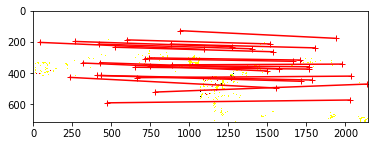

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


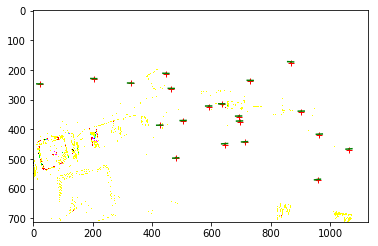

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


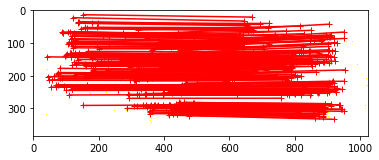

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


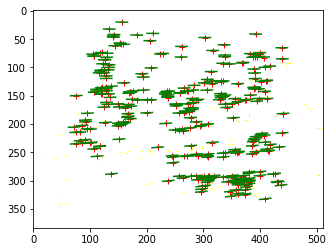

In [5]:
my_main()